In [42]:
import numpy as np

In [43]:
import torch

In [44]:
from __future__ import print_function
import argparse
import numpy  as np
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import transforms

In [45]:
import data_loaders

In [46]:
from data_loaders import Plain_Dataset, eval_data_dataloader

In [373]:
from SQ_EX_Att import SECNN

In [741]:
device1 = torch.device("cpu" if torch.cuda.is_available() else "cpu")

In [742]:
device2 = torch.device("cpu" if torch.cuda.is_available() else "cpu")

In [743]:
device3 = torch.device("cpu" if torch.cuda.is_available() else "cpu")

In [860]:
input_shape = (3, 48, 48)
model1 = SECNN(input_shape,num_classes=8)

In [861]:
input_shape = (3, 48, 48)
model2 = SECNN(input_shape,num_classes=8)

In [862]:
input_shape = (3, 48, 48)
model3 = SECNN(input_shape,num_classes=8)

In [863]:
def vote(tally):
    """
    Perform a vote on each element of the given lists.
    In case of a tie, the value from the first list is chosen.
    
    Parameters:
    - tally: List of lists, each of the same length.
    
    Returns:
    - List containing the voted values.
    """
    result = []
    list_len = len(tally[0])

    for i in range(list_len):
        # Count occurrences of each element in the current position
        counts = {}
        for lst in tally:
            value = lst[i]
            counts[value] = counts.get(value, 0) + 1
        
        # Find the element with the maximum count
        max_count = max(counts.values())
        candidates = [key for key, count in counts.items() if count == max_count]
        
        # Choose the winner, or use the value from the first list in case of a tie
        winner = candidates[0] if len(candidates) == 1 else tally[0][i]
        result.append(winner)

    return result


In [864]:
classes = ('Anger', 'Contempt', 'Disgust', 'Fear', 'Happiness',
        'Neutral', 'Sadness', 'Surprise')

In [866]:
model1.load_state_dict(torch.load("SQEX_weights"))
model2.load_state_dict(torch.load("SQEX_weights2"))
model3.load_state_dict(torch.load("SQEX_weights3"))


<All keys matched successfully>

In [867]:
model1.to(device1)

SECNN(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (dropout1): Dropout(p=0.1, inplace=False)
  (se1): SqueezeExciteBlock(
    (squeeze): AdaptiveAvgPool2d(output_size=1)
    (fc1): Linear(in_features=8, out_features=1, bias=True)
    (relu): ReLU(inplace=True)
    (fc2): Linear(in_features=1, out_features=8, bias=True)
    (sigmoid): Sigmoid()
  )
  (conv2): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (dropout2): Dropout(p=0.1, inplace=False)
  (se2): SqueezeExciteBlock(
    (squeeze): AdaptiveAvgPool2d(output_size=1)
    (fc1): Linear(in_features=8, out_features=1, bias=True)
    (relu): ReLU(inplace=True)
    (fc2): Linear(in_features=1, out_features=8, bias=True)
    (sigmoid): Sigmoid()
  )
  (conv3): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (dropout3): Dropout(p=0.1, inplace=False)
  (se3): SqueezeExciteBlock(
    (squeeze): AdaptiveAvgPool2d(output_size=1)
    (fc1): Linear(in_features=16, out_featur

In [868]:
model2.to(device2)

SECNN(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (dropout1): Dropout(p=0.1, inplace=False)
  (se1): SqueezeExciteBlock(
    (squeeze): AdaptiveAvgPool2d(output_size=1)
    (fc1): Linear(in_features=8, out_features=1, bias=True)
    (relu): ReLU(inplace=True)
    (fc2): Linear(in_features=1, out_features=8, bias=True)
    (sigmoid): Sigmoid()
  )
  (conv2): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (dropout2): Dropout(p=0.1, inplace=False)
  (se2): SqueezeExciteBlock(
    (squeeze): AdaptiveAvgPool2d(output_size=1)
    (fc1): Linear(in_features=8, out_features=1, bias=True)
    (relu): ReLU(inplace=True)
    (fc2): Linear(in_features=1, out_features=8, bias=True)
    (sigmoid): Sigmoid()
  )
  (conv3): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (dropout3): Dropout(p=0.1, inplace=False)
  (se3): SqueezeExciteBlock(
    (squeeze): AdaptiveAvgPool2d(output_size=1)
    (fc1): Linear(in_features=16, out_featur

In [869]:
model3.to(device3)

SECNN(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (dropout1): Dropout(p=0.1, inplace=False)
  (se1): SqueezeExciteBlock(
    (squeeze): AdaptiveAvgPool2d(output_size=1)
    (fc1): Linear(in_features=8, out_features=1, bias=True)
    (relu): ReLU(inplace=True)
    (fc2): Linear(in_features=1, out_features=8, bias=True)
    (sigmoid): Sigmoid()
  )
  (conv2): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (dropout2): Dropout(p=0.1, inplace=False)
  (se2): SqueezeExciteBlock(
    (squeeze): AdaptiveAvgPool2d(output_size=1)
    (fc1): Linear(in_features=8, out_features=1, bias=True)
    (relu): ReLU(inplace=True)
    (fc2): Linear(in_features=1, out_features=8, bias=True)
    (sigmoid): Sigmoid()
  )
  (conv3): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (dropout3): Dropout(p=0.1, inplace=False)
  (se3): SqueezeExciteBlock(
    (squeeze): AdaptiveAvgPool2d(output_size=1)
    (fc1): Linear(in_features=16, out_featur

In [870]:
test_dataset= Plain_Dataset(csv_file="demo.csv", img_dir = "demo1/", datatype = 'demo', transform = transformation)
test_loader=   DataLoader(test_dataset,batch_size=1,shuffle = True,num_workers=0)

In [871]:
transformation= transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])

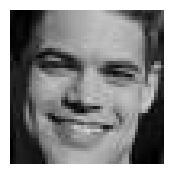

In [872]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image_path = 'demo1/demo0.jpg'

# Set the desired figure size (e.g., (10, 8) inches)
figsize = (3, 2)

# Load and display the image using Matplotlib
img = mpimg.imread(image_path)
plt.figure(figsize=figsize)
plt.imshow(img)
plt.axis('off')  # Turn off axis labels if needed
plt.show()

In [873]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

y_pred1 = []
y_pred2= []
y_pred3 = []
y_true = []
for inputs, labels in test_loader:
        inputs, labels = inputs.to(device1), labels.to(device1)

        output1 = model1(inputs) # Feed Network
        
        output1 = (torch.max(torch.exp(output1), 1)[1]).data.cpu().numpy()
        y_pred1.extend(output1) # Save Prediction
        inputs, labels = inputs.to(device2), labels.to(device2)
        
        output2 = model2(inputs) # Feed Network

        output2 = (torch.max(torch.exp(output2), 1)[1]).data.cpu().numpy()
        y_pred2.extend(output2) # Save Prediction
        
        inputs, labels = inputs.to(device3), labels.to(device3)

        output3 = model3(inputs) # Feed Network

        output3 = (torch.max(torch.exp(output3), 1)[1]).data.cpu().numpy()
        y_pred3.extend(output3) # Save Prediction

        
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth
result = vote([y_pred1, y_pred2, y_pred3])
print(classes[result[0]])

Happiness


In [874]:
test_dataset= Plain_Dataset(csv_file="demo.csv", img_dir = "demo2/", datatype = 'demo', transform = transformation)
test_loader=   DataLoader(test_dataset,batch_size=1,shuffle = True,num_workers=0)

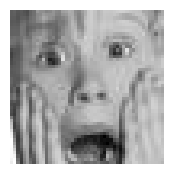

In [875]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image_path = 'demo2/demo0.jpg'

# Set the desired figure size (e.g., (10, 8) inches)
figsize = (3, 2)

# Load and display the image using Matplotlib
img = mpimg.imread(image_path)
plt.figure(figsize=figsize)
plt.imshow(img)
plt.axis('off')  # Turn off axis labels if needed
plt.show()

In [876]:


y_pred1 = []
y_pred2= []
y_pred3 = []
y_true = []
for inputs, labels in test_loader:
        inputs, labels = inputs.to(device1), labels.to(device1)

        output1 = model1(inputs) # Feed Network
        
        output1 = (torch.max(torch.exp(output1), 1)[1]).data.cpu().numpy()
        y_pred1.extend(output1) # Save Prediction
        inputs, labels = inputs.to(device2), labels.to(device2)
        
        output2 = model2(inputs) # Feed Network

        output2 = (torch.max(torch.exp(output2), 1)[1]).data.cpu().numpy()
        y_pred2.extend(output2) # Save Prediction
        
        inputs, labels = inputs.to(device3), labels.to(device3)

        output3 = model3(inputs) # Feed Network

        output3 = (torch.max(torch.exp(output3), 1)[1]).data.cpu().numpy()
        y_pred3.extend(output3) # Save Prediction

        
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth
result = vote([y_pred1, y_pred2, y_pred3])
print(classes[result[0]])

Surprise


In [878]:
test_dataset= Plain_Dataset(csv_file="demo.csv", img_dir = "demo3/", datatype = 'demo', transform = transformation)
test_loader=   DataLoader(test_dataset,batch_size=1,shuffle = True,num_workers=0)

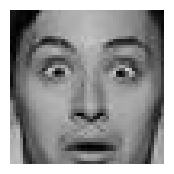

In [879]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image_path = 'demo3/demo0.jpg'

# Set the desired figure size (e.g., (10, 8) inches)
figsize = (3, 2)

# Load and display the image using Matplotlib
img = mpimg.imread(image_path)
plt.figure(figsize=figsize)
plt.imshow(img)
plt.axis('off')  # Turn off axis labels if needed
plt.show()

In [880]:


y_pred1 = []
y_pred2= []
y_pred3 = []
y_true = []
for inputs, labels in test_loader:
        inputs, labels = inputs.to(device1), labels.to(device1)

        output1 = model1(inputs) # Feed Network
        
        output1 = (torch.max(torch.exp(output1), 1)[1]).data.cpu().numpy()
        y_pred1.extend(output1) # Save Prediction
        inputs, labels = inputs.to(device2), labels.to(device2)
        
        output2 = model2(inputs) # Feed Network

        output2 = (torch.max(torch.exp(output2), 1)[1]).data.cpu().numpy()
        y_pred2.extend(output2) # Save Prediction
        
        inputs, labels = inputs.to(device3), labels.to(device3)

        output3 = model3(inputs) # Feed Network

        output3 = (torch.max(torch.exp(output3), 1)[1]).data.cpu().numpy()
        y_pred3.extend(output3) # Save Prediction

        
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth
result = vote([y_pred1, y_pred2, y_pred3])
print(classes[result[0]])

Surprise


In [881]:
test_dataset= Plain_Dataset(csv_file="demo.csv", img_dir = "demo4/", datatype = 'demo', transform = transformation)
test_loader=   DataLoader(test_dataset,batch_size=1,shuffle = True,num_workers=0)

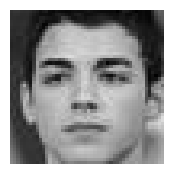

In [882]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image_path = 'demo4/demo0.jpg'

# Set the desired figure size (e.g., (10, 8) inches)
figsize = (3, 2)

# Load and display the image using Matplotlib
img = mpimg.imread(image_path)
plt.figure(figsize=figsize)
plt.imshow(img)
plt.axis('off')  # Turn off axis labels if needed
plt.show()

In [883]:


y_pred1 = []
y_pred2= []
y_pred3 = []
y_true = []
for inputs, labels in test_loader:
        inputs, labels = inputs.to(device1), labels.to(device1)

        output1 = model1(inputs) # Feed Network
        
        output1 = (torch.max(torch.exp(output1), 1)[1]).data.cpu().numpy()
        y_pred1.extend(output1) # Save Prediction
        inputs, labels = inputs.to(device2), labels.to(device2)
        
        output2 = model2(inputs) # Feed Network

        output2 = (torch.max(torch.exp(output2), 1)[1]).data.cpu().numpy()
        y_pred2.extend(output2) # Save Prediction
        
        inputs, labels = inputs.to(device3), labels.to(device3)

        output3 = model3(inputs) # Feed Network

        output3 = (torch.max(torch.exp(output3), 1)[1]).data.cpu().numpy()
        y_pred3.extend(output3) # Save Prediction

        
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth
result = vote([y_pred1, y_pred2, y_pred3])
print(classes[result[0]])

Neutral
